In [1]:
import json
from os import listdir
import numpy as np
import seaborn as sns
from itertools import chain
import matplotlib.pyplot as plt

In [2]:
def unique_items_and_counts(cur_probs):
    unique_list = list()
    unique_items = 0
    for item in cur_probs:
        if item not in unique_list:
            unique_list.append(item)
            unique_items += 1
            unique_counts=[]

    for item1 in unique_list:
        has_been_found=False
        for item2 in cur_probs:
            if item1==item2:
                if has_been_found:
                    unique_counts[-1]+=1
                else:
                    unique_counts.append(1)
                    has_been_found=True
    unique_counts
    return unique_list,unique_counts

In [3]:
base_dir='/home/kennethmclarney/Documents/RustProjects/noisygames/test_runs/'
#going to need a better way of importing
all_dirs=[
'Year2022Month2Day22Hour20Min30Sec53',
'Year2022Month2Day22Hour20Min34Sec36',
'Year2022Month2Day22Hour20Min38Sec23',
'Year2022Month2Day22Hour20Min42Sec3',
'Year2022Month2Day22Hour20Min45Sec43',
'Year2022Month2Day22Hour20Min49Sec22',
'Year2022Month2Day22Hour20Min52Sec59',
'Year2022Month2Day22Hour20Min56Sec41',
'Year2022Month2Day22Hour21Min0Sec19',
'Year2022Month2Day22Hour21Min11Sec14',
'Year2022Month2Day22Hour21Min14Sec50',
'Year2022Month2Day22Hour21Min18Sec26',
'Year2022Month2Day22Hour21Min22Sec6',
'Year2022Month2Day22Hour21Min25Sec44',
'Year2022Month2Day22Hour21Min29Sec22',
'Year2022Month2Day22Hour21Min33Sec3',
'Year2022Month2Day22Hour21Min36Sec42',
'Year2022Month2Day22Hour21Min3Sec56',
'Year2022Month2Day22Hour21Min40Sec21',
'Year2022Month2Day22Hour21Min44Sec1',
'Year2022Month2Day22Hour21Min47Sec36',
'Year2022Month2Day22Hour21Min51Sec21',
'Year2022Month2Day22Hour21Min54Sec59',
'Year2022Month2Day22Hour21Min58Sec37',
'Year2022Month2Day22Hour21Min7Sec35',
'Year2022Month2Day22Hour22Min13Sec17',
'Year2022Month2Day22Hour22Min16Sec57',
'Year2022Month2Day22Hour22Min20Sec34',
'Year2022Month2Day22Hour22Min24Sec14',
'Year2022Month2Day22Hour22Min27Sec54',
'Year2022Month2Day22Hour22Min2Sec16',
'Year2022Month2Day22Hour22Min31Sec33',
'Year2022Month2Day22Hour22Min35Sec14',
'Year2022Month2Day22Hour22Min38Sec53',
'Year2022Month2Day22Hour22Min42Sec35',
'Year2022Month2Day22Hour22Min46Sec20',
'Year2022Month2Day22Hour22Min49Sec58',
'Year2022Month2Day22Hour22Min53Sec36',
'Year2022Month2Day22Hour22Min57Sec19',
'Year2022Month2Day22Hour22Min5Sec59',
'Year2022Month2Day22Hour22Min9Sec39',
'Year2022Month2Day22Hour23Min12Sec6',
'Year2022Month2Day22Hour23Min15Sec52',
'Year2022Month2Day22Hour23Min19Sec37',
'Year2022Month2Day22Hour23Min1Sec2',
'Year2022Month2Day22Hour23Min23Sec25',
'Year2022Month2Day22Hour23Min27Sec10',
'Year2022Month2Day22Hour23Min30Sec58',
'Year2022Month2Day22Hour23Min34Sec46',
'Year2022Month2Day22Hour23Min38Sec33',
'Year2022Month2Day22Hour23Min42Sec20',
'Year2022Month2Day22Hour23Min46Sec6',
'Year2022Month2Day22Hour23Min49Sec51',
'Year2022Month2Day22Hour23Min4Sec45',
'Year2022Month2Day22Hour23Min53Sec36',
'Year2022Month2Day22Hour23Min57Sec27',
'Year2022Month2Day22Hour23Min8Sec24',
'Year2022Month2Day23Hour0Min12Sec34',
'Year2022Month2Day23Hour0Min16Sec19',
'Year2022Month2Day23Hour0Min1Sec13',
'Year2022Month2Day23Hour0Min20Sec7',
'Year2022Month2Day23Hour0Min23Sec54',
'Year2022Month2Day23Hour0Min27Sec39',
'Year2022Month2Day23Hour0Min31Sec31',
'Year2022Month2Day23Hour0Min35Sec21',
'Year2022Month2Day23Hour0Min39Sec8',
'Year2022Month2Day23Hour0Min42Sec57',
'Year2022Month2Day23Hour0Min46Sec42',
'Year2022Month2Day23Hour0Min4Sec58',
'Year2022Month2Day23Hour0Min50Sec29',
'Year2022Month2Day23Hour0Min54Sec14',
'Year2022Month2Day23Hour0Min57Sec57',
'Year2022Month2Day23Hour0Min8Sec51',
'Year2022Month2Day23Hour1Min12Sec59',
'Year2022Month2Day23Hour1Min16Sec46',
'Year2022Month2Day23Hour1Min1Sec42',
'Year2022Month2Day23Hour1Min20Sec30',
'Year2022Month2Day23Hour1Min24Sec14',
'Year2022Month2Day23Hour1Min28Sec1',
'Year2022Month2Day23Hour1Min31Sec48',
'Year2022Month2Day23Hour1Min35Sec33',
'Year2022Month2Day23Hour1Min39Sec20',
'Year2022Month2Day23Hour1Min43Sec5',
'Year2022Month2Day23Hour1Min46Sec51',
'Year2022Month2Day23Hour1Min50Sec34',
'Year2022Month2Day23Hour1Min54Sec17',
'Year2022Month2Day23Hour1Min58Sec1',
'Year2022Month2Day23Hour1Min5Sec30',
'Year2022Month2Day23Hour1Min9Sec14',
'Year2022Month2Day23Hour2Min13Sec3',
'Year2022Month2Day23Hour2Min16Sec46',
'Year2022Month2Day23Hour2Min1Sec45',
'Year2022Month2Day23Hour2Min20Sec32',
'Year2022Month2Day23Hour2Min24Sec22',
'Year2022Month2Day23Hour2Min28Sec7',
'Year2022Month2Day23Hour2Min31Sec52',
'Year2022Month2Day23Hour2Min35Sec36',
'Year2022Month2Day23Hour2Min39Sec23'  
]
last_round='/round49'

In [4]:
all_outcomes=[]
for tmp_dir in all_dirs:
    current_file_loc=base_dir+tmp_dir+last_round+'/all_probs.json'
    f=open(current_file_loc)
    cur_probs=json.load(f)
    f.close()
    all_outcomes.append(unique_items_and_counts(cur_probs))

In [5]:
end_population=list(chain(*list(list(zip(*all_outcomes))[0])))

In [6]:
unique_end=unique_items_and_counts(end_population)[0]

In [7]:
overall_counts=[0]*len(unique_end)
for i in range(len(unique_end)):
    tmp_unique=unique_end[i]
    for j in range(len(all_outcomes)):
        for k in range(len(all_outcomes[j][1])):
            #print(all_outcomes[j][0][k])
            #print(all_outcomes[j][1][k])
            tmp_item=all_outcomes[j][0][k]
            if tmp_unique==tmp_item:
                overall_counts[i]+=all_outcomes[j][1][k]


In [8]:
all_names=[];
for un in unique_end:
    all_names.append(", ".join(str(elem) for elem in un))


In [9]:
#put filters here


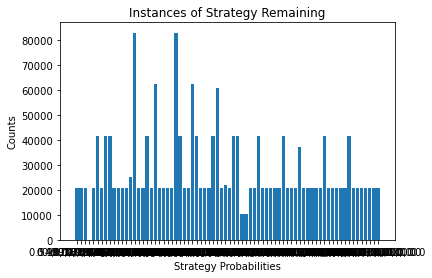

In [10]:
plt.bar(all_names,overall_counts)
plt.title('Instances of Strategy Remaining')
plt.xlabel('Strategy Probabilities')
plt.ylabel('Counts')
plt.show()

In [11]:
#may want to filter these down by the ones that have 1 left

In [12]:
single_run_dir='/home/kennethmclarney/Documents/RustProjects/noisygames/test_runs/Year2022Month3Day1Hour20Min23Sec12/'
all_round_data=[]
t_rounds=listdir(single_run_dir)

for i in range(len(t_rounds)):
    fpath=single_run_dir+'round'+str(i)+'/all_probs.json'
    q=open(fpath)
    all_round_data.append(json.load(q))
    q.close()

In [13]:
#within a single run I'd like to know the probability distribution

In [14]:
def get_prob_counts(rnd_dat,every_prob):
    h=len(rnd_dat)
    p_cc=[]
    p_cd=[]
    p_dc=[]
    p_dd=[]
    for i in range(h):
        p_cc.append(rnd_dat[i][0])
        p_cd.append(rnd_dat[i][1])
        p_dc.append(rnd_dat[i][2])
        p_dd.append(rnd_dat[i][3])
    full_out=[
        get_num_per_node(p_cc,every_prob),
        get_num_per_node(p_cd,every_prob),
        get_num_per_node(p_dc,every_prob),
        get_num_per_node(p_dd,every_prob)
    ]
    return full_out
    
def get_num_per_node(p_vec,every_prob):
    round_elem=list(set(p_vec))
    round_elem=sorted(round_elem)
    num_of_elem=[0]*len(every_prob)

    for i in range(len(every_prob)):
        for j in range(len(round_elem)):
            
            if every_prob[i]>round_elem[j]-.001 and every_prob[i]<round_elem[j]+.001:
                num_of_elem[i]+=p_vec.count(round_elem[j])
    #great, now we have all the good unique stuff and their respective counts
    #the pair of these is the distribution
    return num_of_elem
def get_pxx_out(all_round_data,every_prob):
    p_cc_round_counts=[]
    p_cd_round_counts=[]
    p_dc_round_counts=[]
    p_dd_round_counts=[]

    for rnd_dat in all_round_data:
        p_cc_round_counts.append(get_prob_counts(rnd_dat,every_prob)[0])
        p_cd_round_counts.append(get_prob_counts(rnd_dat,every_prob)[1])
        p_dc_round_counts.append(get_prob_counts(rnd_dat,every_prob)[2])
        p_dd_round_counts.append(get_prob_counts(rnd_dat,every_prob)[3])
    return p_cc_round_counts, p_cd_round_counts, p_dc_round_counts, p_dd_round_counts
def plot_distribs_p_xx(p_xx_round_counts,every_prob,plot_title):
    prob_distribs=np.array(p_xx_round_counts)*(1/sum(p_xx_round_counts[0]))
    plt.figure(figsize=(20,14))
    sns.set(font_scale=2)
    ax=sns.heatmap(np.transpose(prob_distribs),linewidth=1,cmap='Blues')
    plt.xlabel('Generation')
    plt.ylabel('Probability of Cooperation')
    plt.title(plot_title)
    ax.set_xticklabels(np.arange(0,50,2))
    ax.set_yticklabels(every_prob)

    plt.show()

In [15]:
#now i can package this up into a build distribution function that will do this for every round
#there are some manipulations I expect to be somewhat difficult for whatever plotting utility
#we decide to use, so I'll figure out how to plot a repeated sequence of what
#we've got first before architecting something more involved.

In [16]:
every_prob=[0.0,0.09,0.18,0.27,0.36,0.45,0.54,0.63,0.72,0.81,0.9,0.99]
y_labels=['0.0','0.09','0.18','0.27','0.36','0.45','0.54','0.63','0.72','0.81','0.90','0.99']

p_cc_round_counts, p_cd_round_counts, p_dc_round_counts, p_dd_round_counts=get_pxx_out(all_round_data,every_prob)

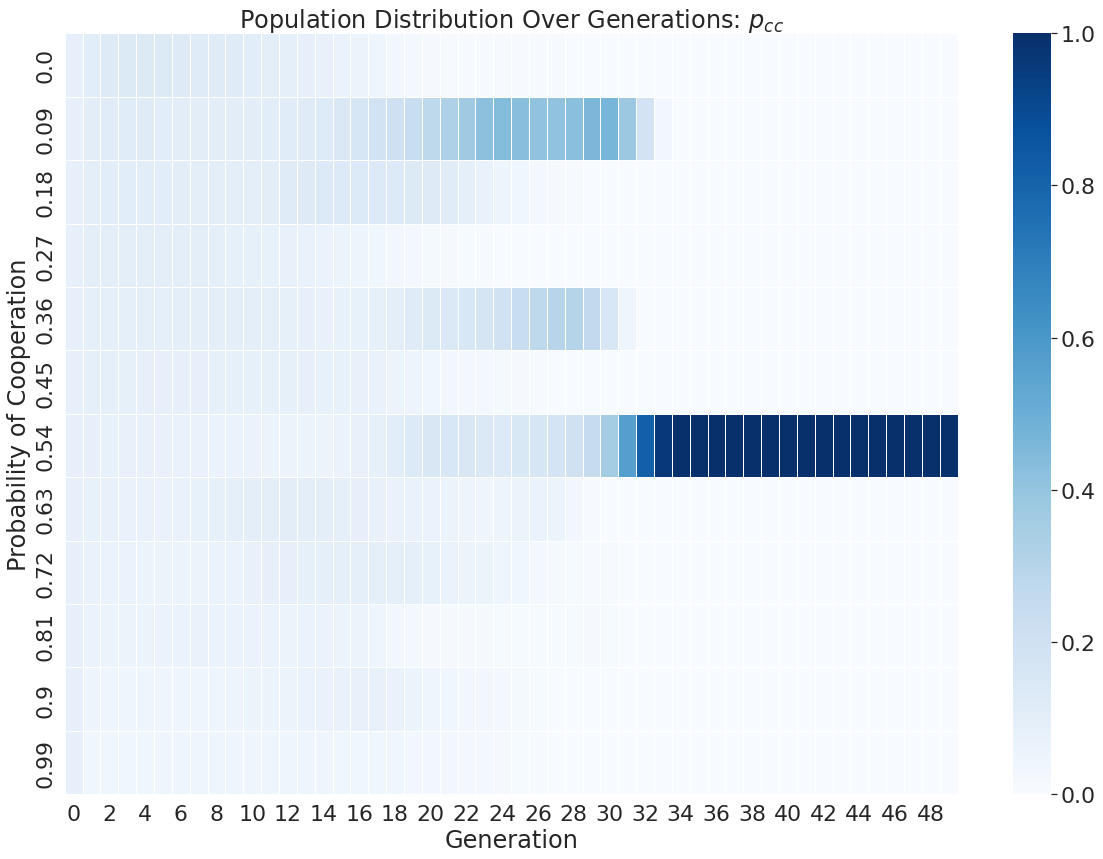

In [17]:
plot_title='Population Distribution Over Generations: $p_{cc}$'
plot_distribs_p_xx(p_cc_round_counts,every_prob,plot_title)

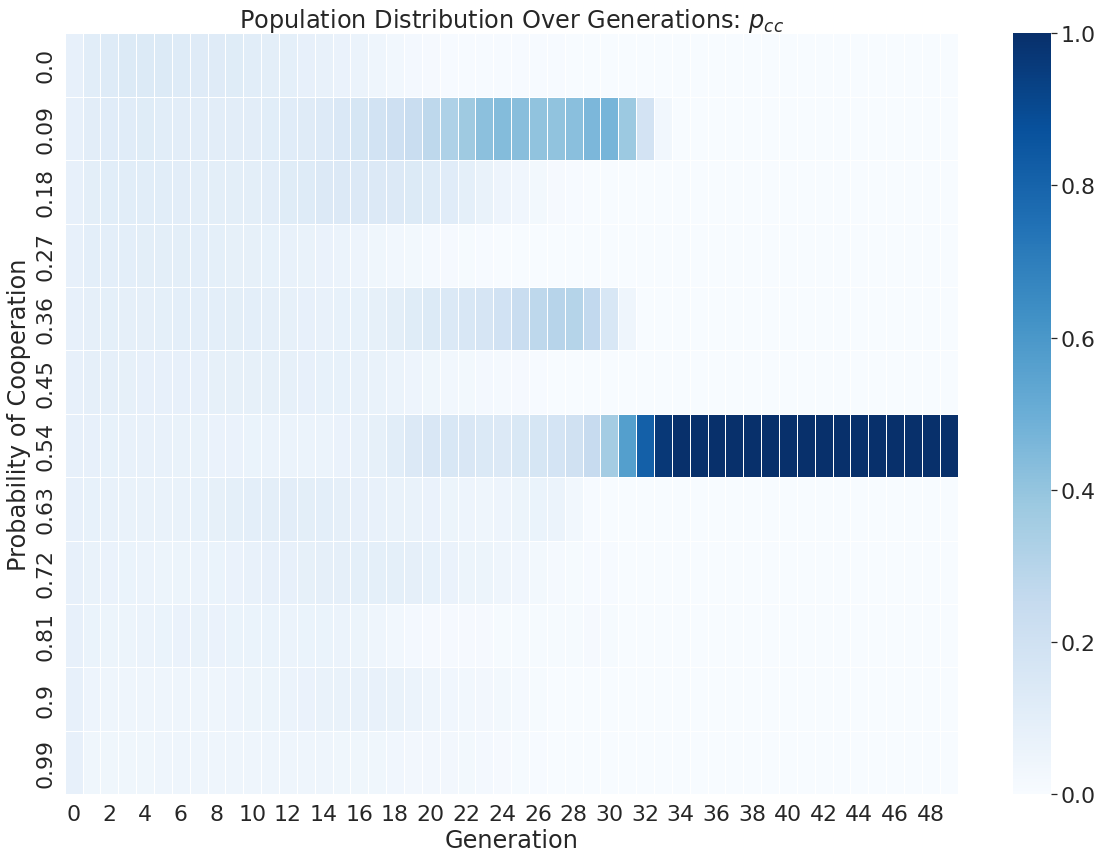

In [18]:
plot_title='Population Distribution Over Generations: $p_{cc}$'
plot_distribs_p_xx(p_cc_round_counts,every_prob,plot_title)

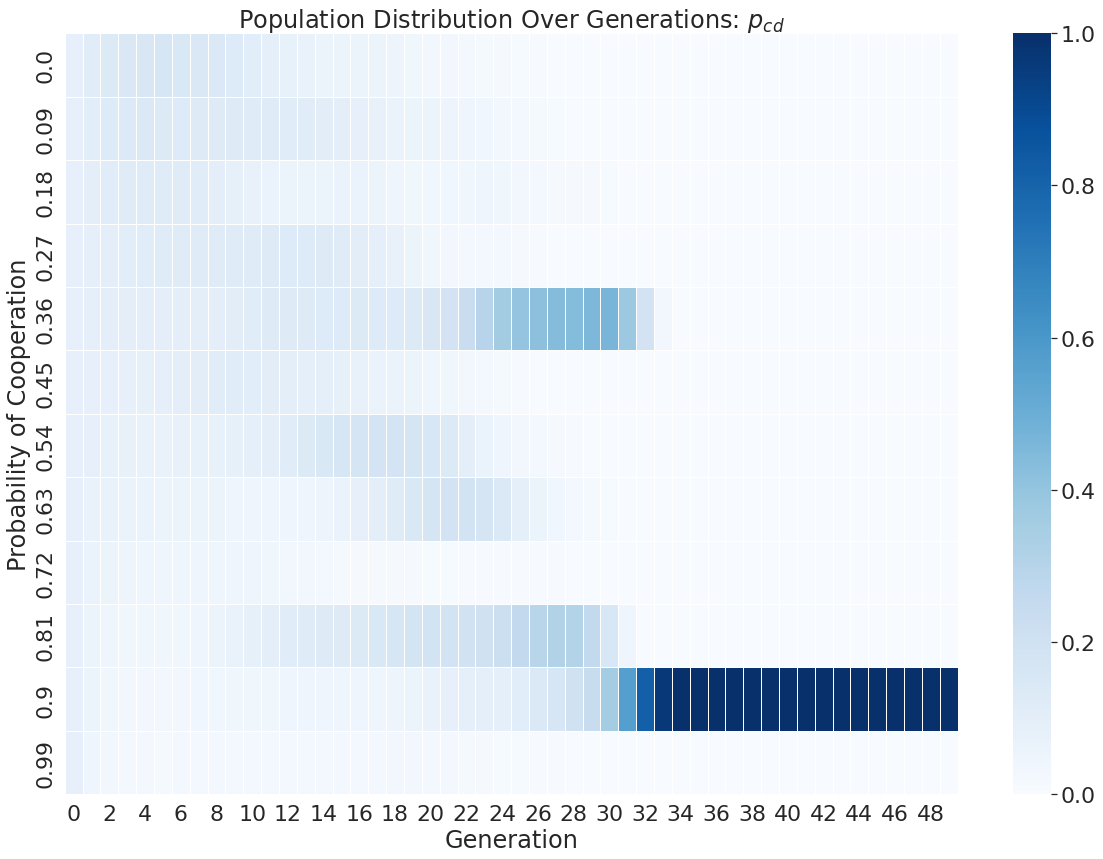

In [19]:
plot_title='Population Distribution Over Generations: $p_{cd}$'
plot_distribs_p_xx(p_cd_round_counts,every_prob,plot_title)

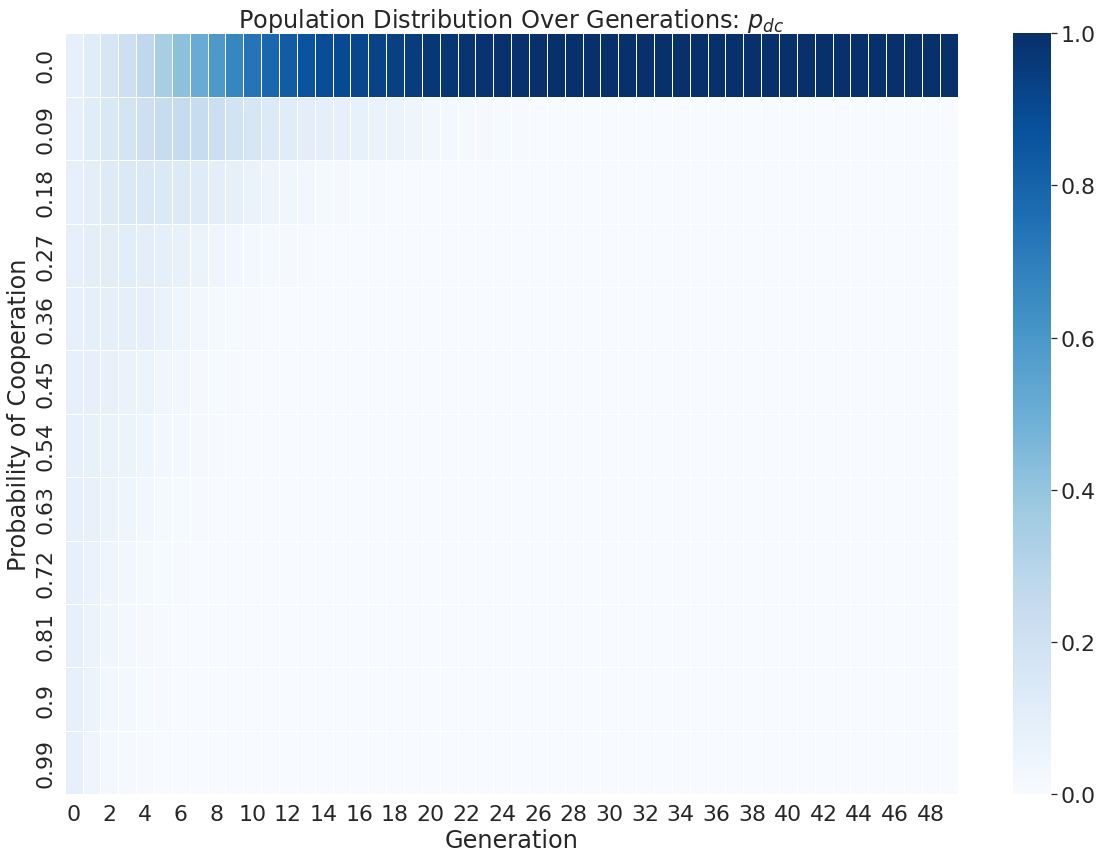

In [20]:
plot_title='Population Distribution Over Generations: $p_{dc}$'
plot_distribs_p_xx(p_dc_round_counts,every_prob,plot_title)

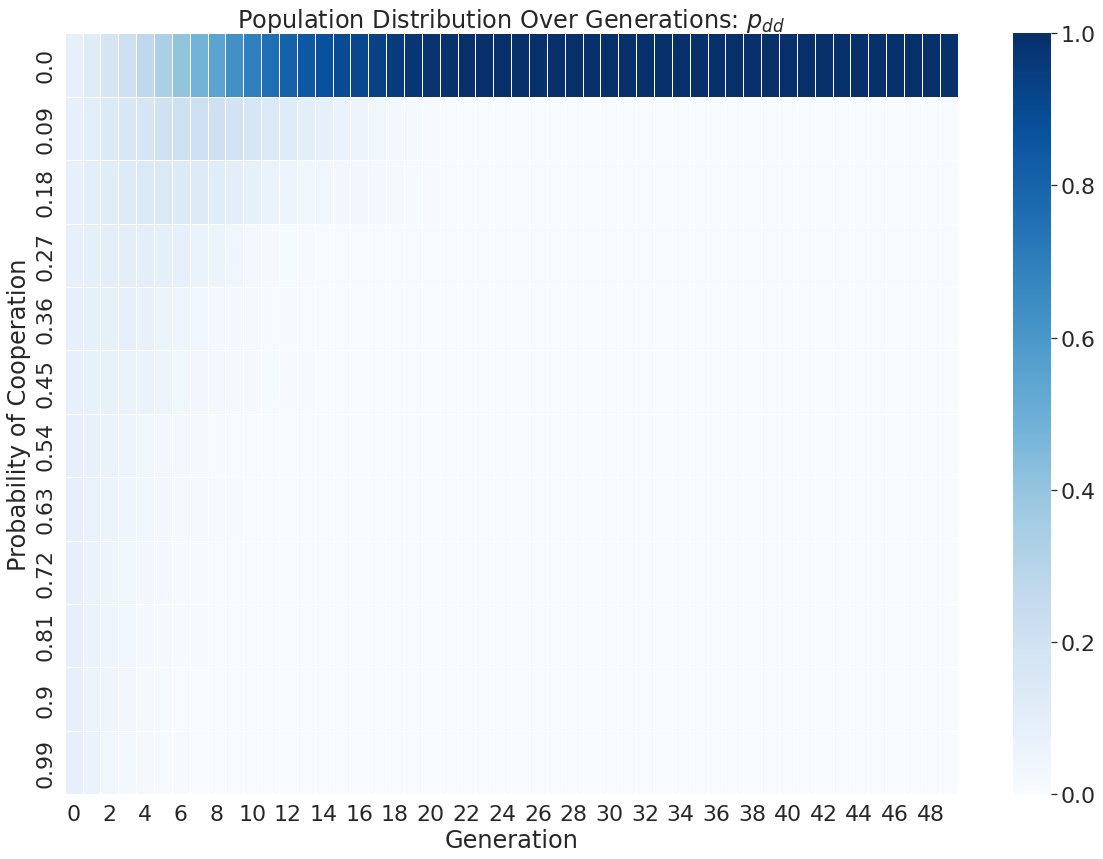

In [21]:
plot_title='Population Distribution Over Generations: $p_{dd}$'
plot_distribs_p_xx(p_dd_round_counts,every_prob,plot_title)

In [22]:
t_dir='/home/kennethmclarney/Documents/RustProjects/noisygames/test_runs/'
t_1k=sorted(listdir(t_dir))[-1000:-1]
last_1k_runs=[]
for t in t_1k:
    v=t_dir+t+'/round49/all_probs.json'
    f=open(v)
    tp=json.load(f)
    last_1k_runs.append(tp[-1])
    f.close()
#great, got all the files loaded

In [23]:
#now that everything's loaded, we can get a distribution of the converged results, break these out into p_xx
last_1k_runs
p_cc_round_counts, p_cd_round_counts, p_dc_round_counts, p_dd_round_counts=get_pxx_out(all_round_data,every_prob)

In [49]:
last_1k_runs[0:10]

[[0.54, 0.9, 0.0, 0.0],
 [0.63, 0.0, 0.0, 0.0],
 [0.63, 0.72, 0.0, 0.0],
 [0.36, 0.9, 0.0, 0.0],
 [0.18, 0.36, 0.0, 0.0],
 [0.63, 0.0, 0.0, 0.0],
 [0.72, 0.09, 0.09, 0.0],
 [0.27, 0.27, 0.0, 0.0],
 [0.81, 0.18, 0.0, 0.0],
 [0.81, 0.9, 0.0, 0.0]]

In [25]:
p_cc_counts=[0]*len(every_prob)
p_cd_counts=[0]*len(every_prob)
p_dc_counts=[0]*len(every_prob)
p_dd_counts=[0]*len(every_prob)
for run in last_1k_runs:
    for i in range(len(every_prob)):
        if run[0]==every_prob[i]:
            p_cc_counts[i]+=1
        if run[1]==every_prob[i]:
            p_cd_counts[i]+=1
        if run[2]==every_prob[i]:
            p_dc_counts[i]+=1
        if run[3]==every_prob[i]:
            p_dd_counts[i]+=1


In [26]:
def plot_transition_convergence(p_xx_counts,every_prob,plot_title):
    plt.figure(figsize=(8,8))
    plt.plot(every_prob,np.array(p_xx_counts)*(100/sum(p_xx_counts)))
    plt.xlabel('Probability of cooperating')
    plt.ylabel('Percentage of Converging Players')
    plt.title(plot_title)
    plt.show()

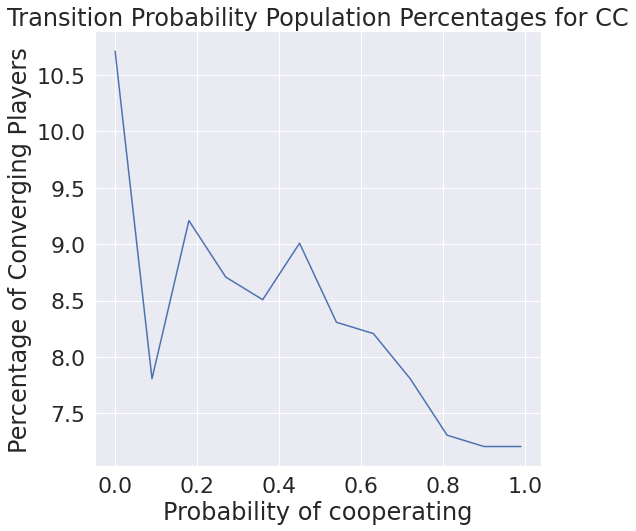

In [53]:
plot_title='Transition Probability Population Percentages for CC'
plot_transition_convergence(p_cc_counts,every_prob,plot_title)

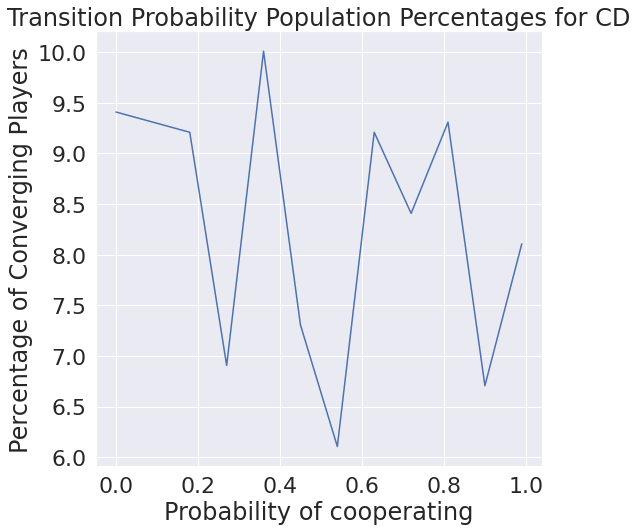

In [52]:
plot_title='Transition Probability Population Percentages for CD'
plot_transition_convergence(p_cd_counts,every_prob,plot_title)

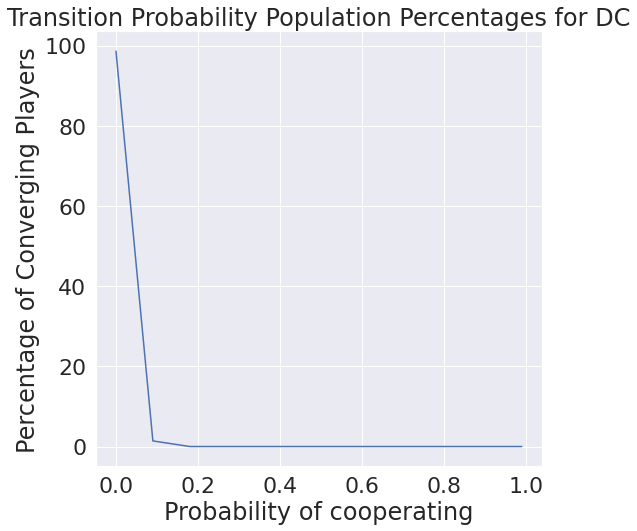

In [51]:
plot_title='Transition Probability Population Percentages for DC'
plot_transition_convergence(p_dc_counts,every_prob,plot_title)

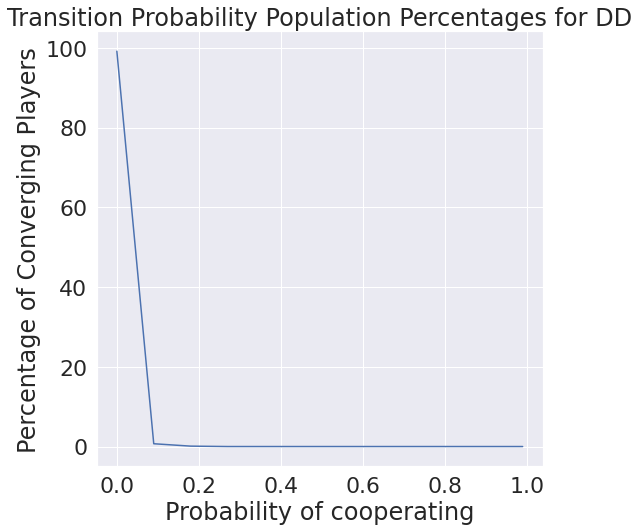

In [50]:
plot_title='Transition Probability Population Percentages for DD'
plot_transition_convergence(p_dd_counts,every_prob,plot_title)

In [46]:
def plot_by_unique(end_population):
    unique_end,cnts=unique_items_and_counts(end_population)
    overall_counts=[0]*len(unique_end)
    for i in range(len(unique_end)):
        tmp_unique=unique_end[i]
        for j in range(len(all_outcomes)):
            for k in range(len(all_outcomes[j][1])):
                #print(all_outcomes[j][0][k])
                #print(all_outcomes[j][1][k])
                tmp_item=all_outcomes[j][0][k]
                if tmp_unique==tmp_item:
                    overall_counts[i]+=all_outcomes[j][1][k]
    all_names=[];
    for un in unique_end:
        all_names.append(", ".join(str(elem) for elem in un))
    plt.figure(figsize=(12,12))
    plt.bar(np.arange(1,len(cnts)+1,1),cnts)
    plt.title('Instances of Strategy Remaining')
    plt.xlabel('Strategy #')
    plt.ylabel('Counts')
    plt.show()
    return all_names,overall_counts

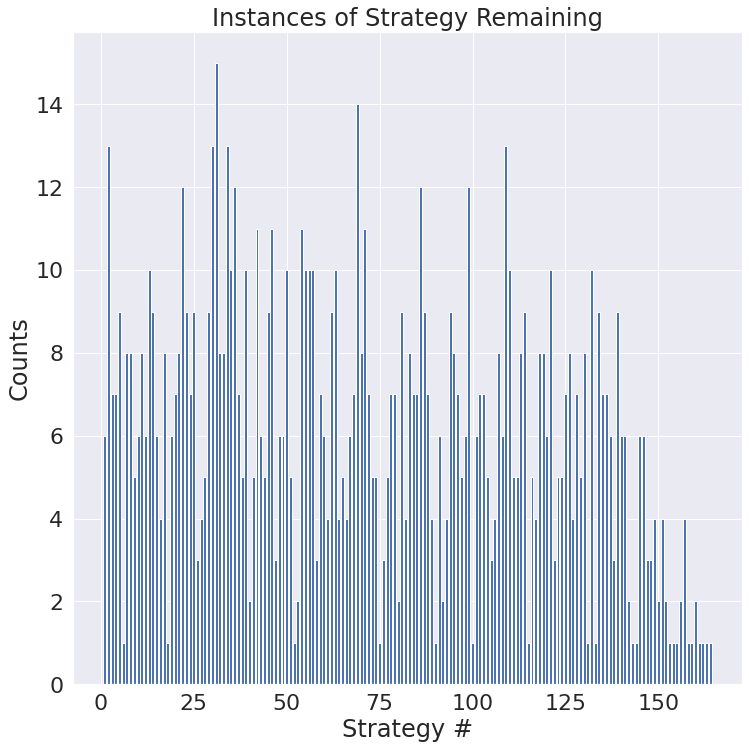

In [47]:
v1,v2=plot_by_unique(last_1k_runs)

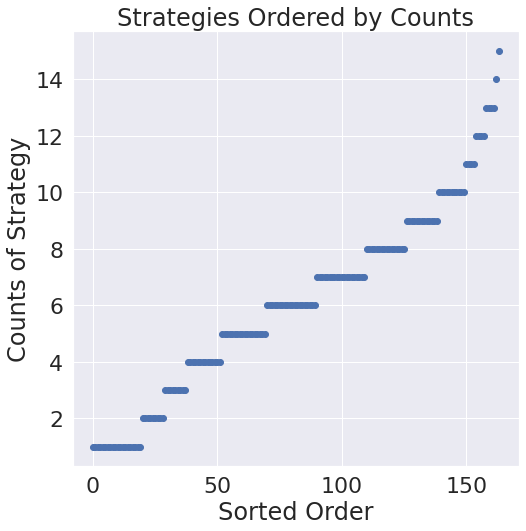

In [56]:
unique_end,cnts=unique_items_and_counts(last_1k_runs)
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0,len(cnts)),sorted(cnts))
plt.ylabel('Counts of Strategy')
plt.xlabel('Sorted Order')
plt.title('Strategies Ordered by Counts')
plt.show()

In [57]:
from sklearn.cluster import KMeans

In [62]:
kmeans = KMeans(init="random",n_clusters=2,n_init=200,max_iter=300,random_state=41)
kmeans.fit(last_1k_runs)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)


[[ 4.06829268e-01  7.55853659e-01  3.65853659e-04 -1.62630326e-18]
 [ 5.24378698e-01  2.12485207e-01  2.13017751e-03  1.59763314e-03]]
4


AttributeError: 'KMeans' object has no attribute 'plot'

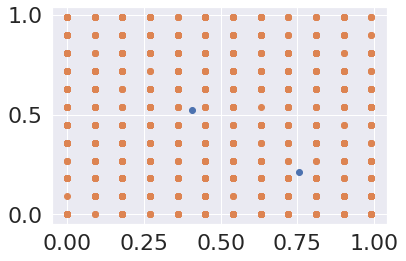

In [71]:
#would like to plot each of these in space, particularly on p_cc and p_cd
#get first two pieces as entries
cc_data=[]
cd_data=[]
for d in last_1k_runs:
    cc_data.append(d[0])
    cd_data.append(d[1])
plt.scatter([kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1]],[kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1]])
plt.scatter(cc_data,cd_data)
plt.show()

In [77]:
vals=list(set(cc_data))
vals=sorted(vals)
vals

[0.0, 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9, 0.99]

In [83]:
cc_cnts=[0]*len(vals)
cd_cnts=[0]*len(vals)
b=np.zeros([len(vals),len(vals)])
print(b)
for i in range(len(vals)):
    for j in range(len(vals)):
        for m in range(len(cc_data)):
            if cc_data[m]==vals[i] and cd_data[m]==vals[j]:
                b[i][j]+=1
                

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[10.,  1.,  7.,  3., 12., 10.,  6., 14., 13., 12.,  8., 11.],
       [ 2., 10.,  6.,  6., 10.,  6.,  6., 11.,  8.,  3.,  4.,  6.],
       [ 8., 10., 15.,  7.,  9.,  6.,  4.,  3.,  7.,  8.,  6.,  9.],
       [ 4., 10.,  6.,  8.,  7., 10.,  7.,  7.,  2.,  8.,  8., 10.],
       [ 6.,  6.,  7.,  4., 10.,  5.,  4., 10., 14.,  8.,  7.,  4.],
       [10.,  9.,  8.,  7., 10.,  5.,  4.,  7.,  5.,  9.,  5., 11.],
       [ 9.,  2., 10.,  6.,  8.,  4.,  6.,  6.,  7., 13.,  6.,  6.],
       [13.,  8.,  6.,  9.,  3.,  8.,  1.,  7.,  7.,  5.,  8.,  7.],
       [ 7., 10., 10.,  3.,  5.,  5.,  5.,  9.,  7., 10.,  3.,  4.],
       [ 6.,  6.,  8.,  2., 12.,  7.,  4.,  6.,  5.,  8.,  5.,  4.],
       [ 7., 12.,  4.,  5., 11.,  2.,  5.,  7.,  6.,  2.,  5.,  6.],
       [12.,  9.,  5.,  9.,  3.,  5.,  9.,  5.,  3.,  7.,  2.,  3.]])

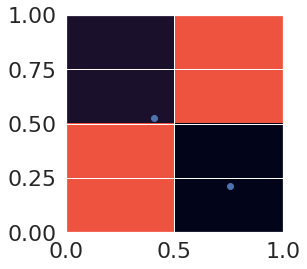

In [90]:
plt.imshow(b)
plt.axis([0,1,0,1])
plt.scatter([kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1]],[kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1]])

plt.show()

In [107]:
len(set(cc_data))

12

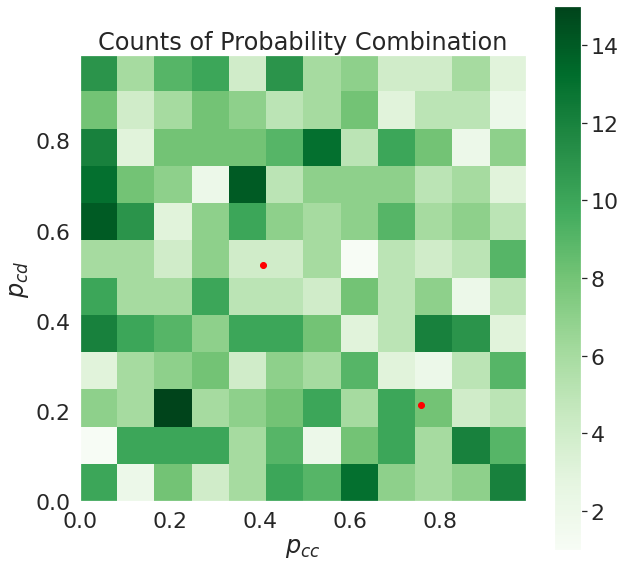

In [120]:
heatmap, xedges, yedges=np.histogram2d(np.array(cc_data),
                                       np.array(cd_data),bins=12)
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.figure(figsize=(10,10))
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap='Greens')
plt.colorbar()
plt.grid(None)
plt.scatter([kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1]],[kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1]],color='red')
plt.title('Counts of Probability Combination')
plt.xlabel('$p_{cc}$')
plt.ylabel('$p_{cd}$')
plt.show()

In [110]:
heatmap

array([[10.,  1.,  7.,  3., 12., 10.,  6., 14., 13., 12.,  8., 11.],
       [ 2., 10.,  6.,  6., 10.,  6.,  6., 11.,  8.,  3.,  4.,  6.],
       [ 8., 10., 15.,  7.,  9.,  6.,  4.,  3.,  7.,  8.,  6.,  9.],
       [ 4., 10.,  6.,  8.,  7., 10.,  7.,  7.,  2.,  8.,  8., 10.],
       [ 6.,  6.,  7.,  4., 10.,  5.,  4., 10., 14.,  8.,  7.,  4.],
       [10.,  9.,  8.,  7., 10.,  5.,  4.,  7.,  5.,  9.,  5., 11.],
       [ 9.,  2., 10.,  6.,  8.,  4.,  6.,  6.,  7., 13.,  6.,  6.],
       [13.,  8.,  6.,  9.,  3.,  8.,  1.,  7.,  7.,  5.,  8.,  7.],
       [ 7., 10., 10.,  3.,  5.,  5.,  5.,  9.,  7., 10.,  3.,  4.],
       [ 6.,  6.,  8.,  2., 12.,  7.,  4.,  6.,  5.,  8.,  5.,  4.],
       [ 7., 12.,  4.,  5., 11.,  2.,  5.,  7.,  6.,  2.,  5.,  6.],
       [12.,  9.,  5.,  9.,  3.,  5.,  9.,  5.,  3.,  7.,  2.,  3.]])